In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/archive (1)/Myntra Fasion Clothing.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5796\1871270047.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Lenovo/Downloads/archive (1)/Myntra Fasion Clothing.csv')


Problem Statement:
Myntra, a popular e-commerce platform for fashion and lifestyle products, wants to analyze its product data to gain insights into pricing strategies, customer preferences, and product performance. The goal is to identify trends in discounting, evaluate the relationship between ratings and other factors, and understand the distribution of products across categories and brands.

In [3]:
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


## Data Cleaning

In [4]:
# Renaming columns
df.rename(columns = {'DiscountPrice (in Rs)' : 'Selling_Price', 'OriginalPrice (in Rs)' : 'Original_Price','category_by_Gender':'Gender'}, inplace = True)

In [5]:
# dropping columns
df.drop(columns = ['URL', 'SizeOption'], inplace = True)

In [6]:
# dropping columns
df.drop(columns = ['DiscountOffer'], inplace = True)

In [7]:
# Handling null values
df.isnull().mean() * 100

Product_id              0.000000
BrandName               0.000000
Category                0.000000
Individual_category     0.000000
Gender                  0.000000
Description             0.000000
Selling_Price          36.682720
Original_Price          0.000000
Ratings                63.838774
Reviews                63.838774
dtype: float64

In [8]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.16436026769775375

In [9]:
# filling DiscountPrice with average Price
df['Selling_Price'].fillna(df['Selling_Price'].mean(), inplace = True)

In [10]:
# creating Discount Column
df['Discount_allowed'] = ((df['Original_Price'] - df['Selling_Price']) / df['Original_Price']) * 100

Note: As there are 62 % missing data in columns Ratings and Reviews. It will not appropriate to dropping or filling the data. As we can get loss of large amount of data

In [11]:
clean_df = df[df['Discount_allowed'] >= 0]

## Exploratory Data Analysis

In [12]:
clean_df.head()

,Product_id,BrandName,Category,Individual_category,Gender,Description,Selling_Price,Original_Price,Ratings,Reviews,Discount_allowed
0,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,3.9,999.0,45.030020
1,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,4.0,999.0,55.004352
2,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,4.3,999.0,55.039314
3,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,4.2,999.0,31.042471
6,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,3.9,998.0,60.040027


### Category Analysis

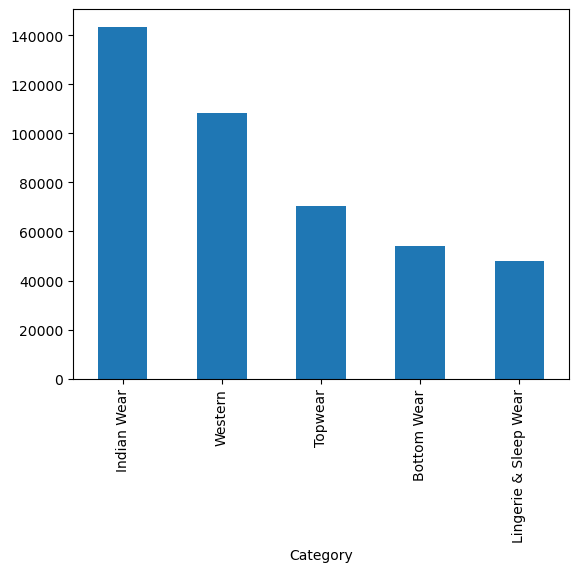

In [13]:
# Top 5 Highest Selling Categories
clean_df['Category'].value_counts().nlargest(5).plot(kind = 'bar')
plt.show()

In [14]:
def format_func(value, tick_number):
    return f'{int(value/1e7)} Cr'

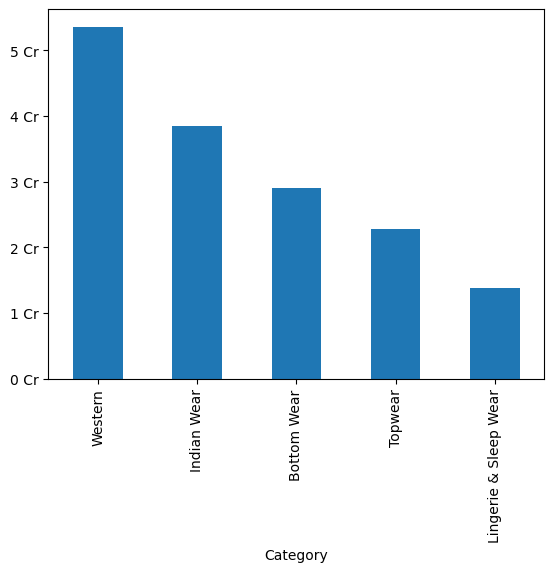

In [71]:
# Top 5 Highest Revenue making Categories
clean_df.groupby('Category').agg({'Selling_Price':'sum'}).sort_values(by = 'Selling_Price',ascending = False).head().plot(kind = 'bar')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.legend().set_visible(False)

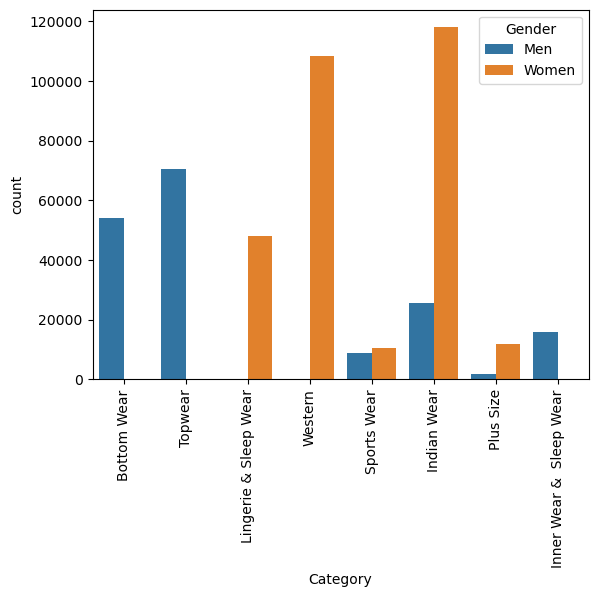

In [17]:
# Category Purchasing Behaviour By gender
sns.countplot(data = clean_df, x = 'Category',hue = 'Gender')
plt.xticks(rotation=90)
plt.show()

In [18]:
#  Get the top 10 categories
top_10_individual_category = clean_df['Individual_category'].value_counts().nlargest(10).index

In [19]:
# Filter the DataFrame to include only the top 10 categories
clean_df_top_10 = clean_df[clean_df['Individual_category'].isin(top_10_individual_category)]

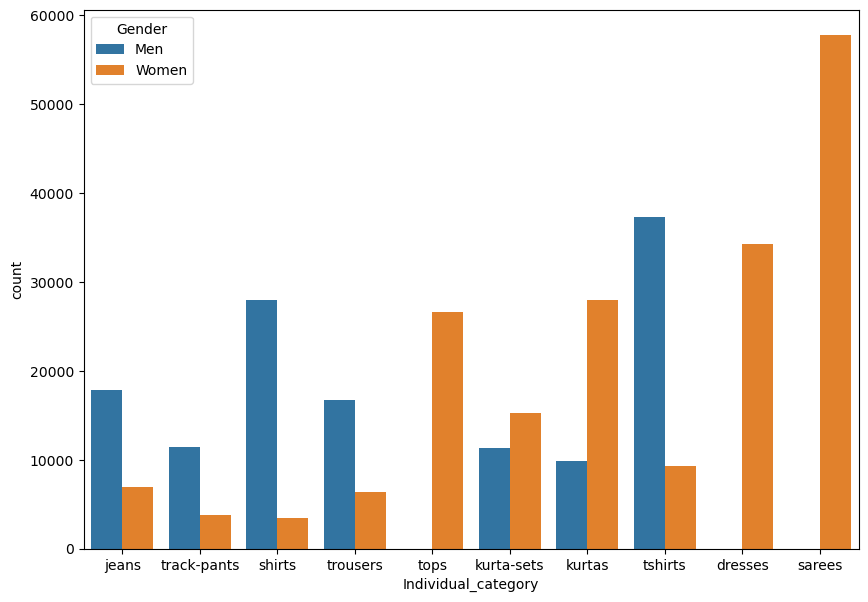

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(data = clean_df_top_10, x = 'Individual_category', hue = 'Gender')
plt.show()

In [21]:
# Relationship b/w Brand and Individual Category

In [22]:
grouped = clean_df_top_10.groupby(['Individual_category', 'BrandName']).size().reset_index(name='count')

In [23]:
top_brands = grouped.loc[grouped.groupby('Individual_category')['count'].idxmax()]
top_brands_sorted = top_brands.sort_values('count', ascending=False)

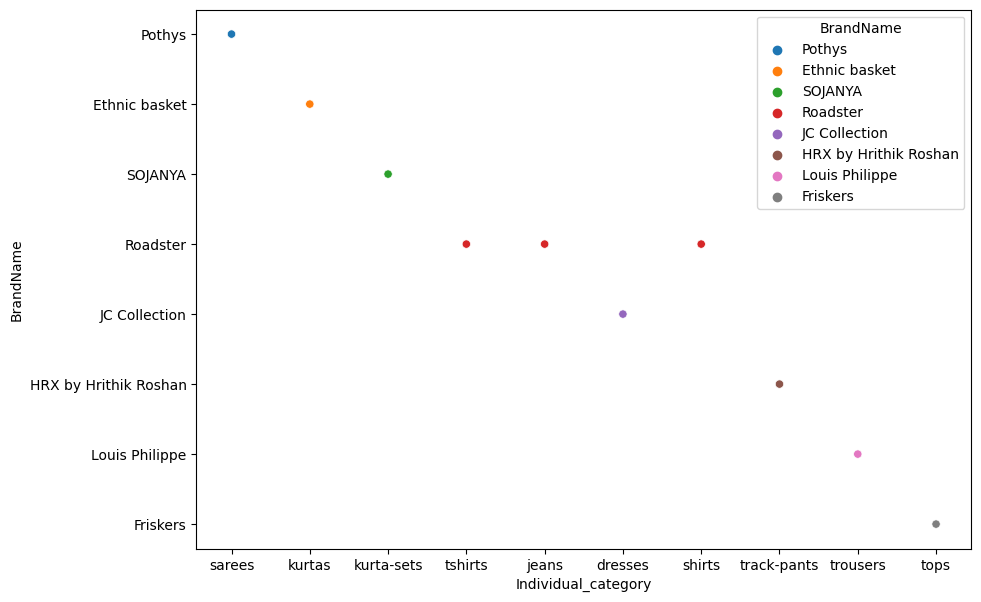

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = top_brands_sorted, x = 'Individual_category', y = 'BrandName', hue = 'BrandName')
plt.show()

## Price Analysis

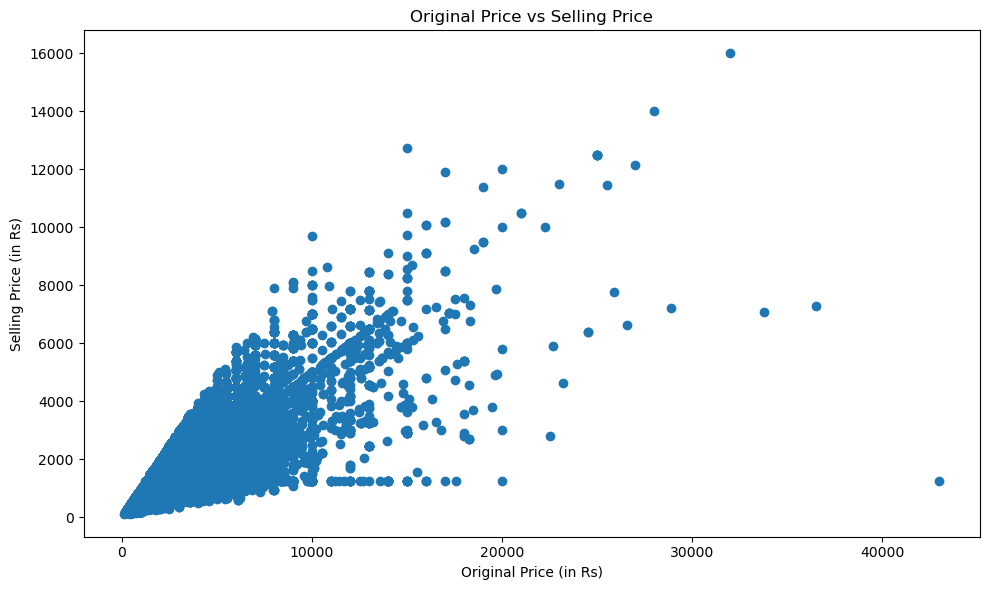

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['Original_Price'], clean_df['Selling_Price'])
plt.title('Original Price vs Selling Price')
plt.xlabel('Original Price (in Rs)')
plt.ylabel('Selling Price (in Rs)')
plt.tight_layout()
plt.show()

- There is a general trend showing a positive correlation between original prices and discount prices. As the original price increases, the Selling price also tends to increase. This is evident from the upward trend in the scatter plot.
- A significant number of data points are clustered in the lower price range (both original and Selling prices). This suggests that most products have relatively lower prices.

## Discount Analysis

In [29]:
clean_df['Discount_allowed'].min()

0.044878746320212666

In [30]:
clean_df['Discount_allowed'].max()

98.62506177653272

In [31]:
bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-5%', '5-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90+%']
# Create the Discount_range column
clean_df['Discount_range'] = pd.cut(clean_df['Discount_allowed'], bins=bins, labels=labels, right=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5796\3593552375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Discount_range'] = pd.cut(clean_df['Discount_allowed'], bins=bins, labels=labels, right=False)


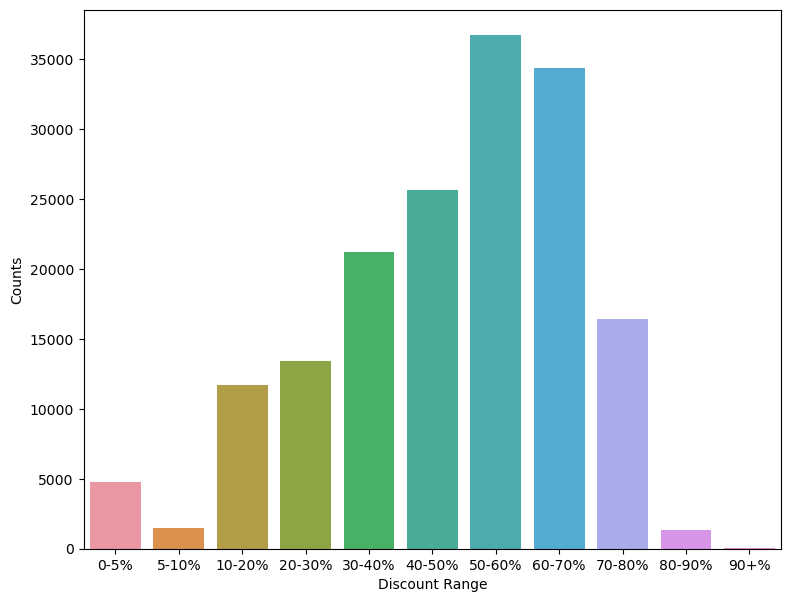

In [74]:
plt.figure(figsize = (9,7))
sns.countplot(data = clean_df, x = 'Discount_range')
plt.xlabel('Discount Range')
plt.ylabel('Counts')
plt.show()

- The highest sales occur in the 50-60% discount range, represented by the tallest bar.
- The second-highest sales are in the 60-70% discount range, closely followed by the 70-80% range.
- There’s a significant drop in sales for discounts less than 50% and greater than 80%.

## Ratings Analysis

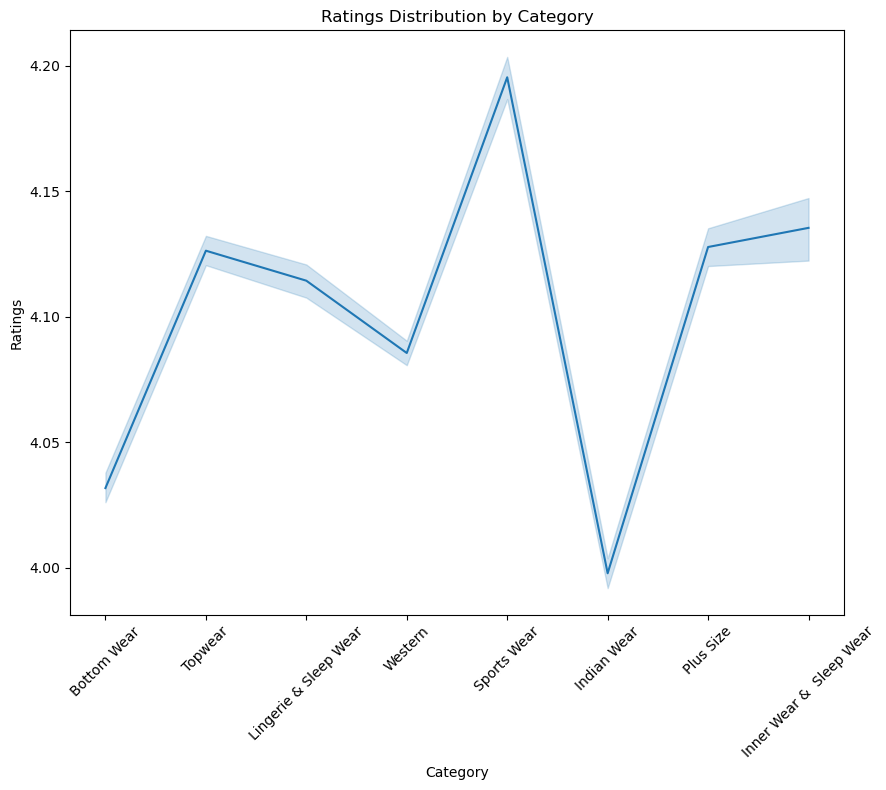

In [33]:
plt.figure(figsize=(9,8))
sns.lineplot(x='Category', y='Ratings', data=clean_df, markers = True)
plt.title('Ratings Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Analysis

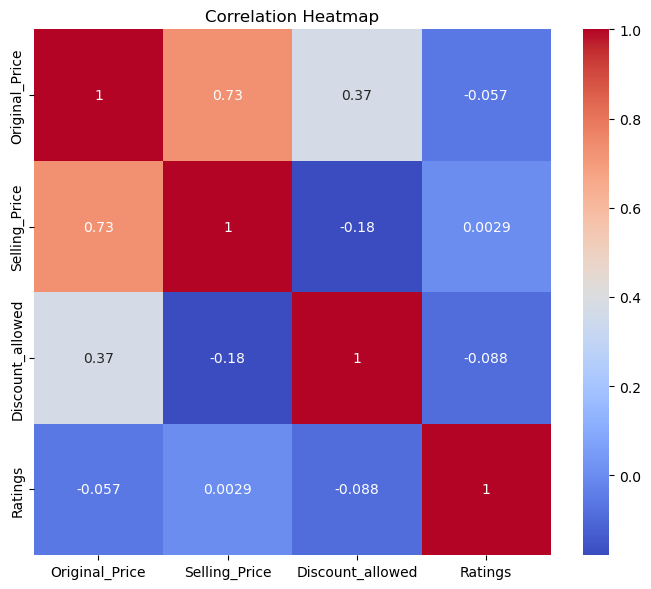

In [35]:
correlation_matrix = clean_df[['Original_Price', 'Selling_Price', 'Discount_allowed', 'Ratings']].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [36]:
# Correlation between Discount and Reviews
correlation = df['Discount_allowed'].corr(df['Reviews'])
print(f"Correlation between Discount Percentage and Number of Reviews: {correlation:.2f}")

Correlation between Discount Percentage and Number of Reviews: -0.02


- A correlation of -0.02 is very close to zero, suggesting that there is almost no linear relationship between the discount percentage and the number of reviews.

## Gender-based Analysis

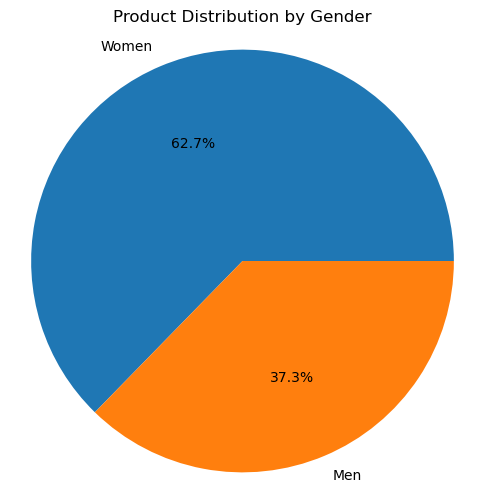

In [38]:
gender_distribution = clean_df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Product Distribution by Gender')
plt.axis('equal')
plt.show()

In [39]:
# Top selling products (based on reviews) and their discounts
top_selling = df.nlargest(10, 'Reviews')[['Product_id', 'BrandName', 'Category', 'Discount_allowed', 'Reviews']]
print("Top 10 Products by Number of Reviews:")
print(top_selling)

Top 10 Products by Number of Reviews:
   Product_id       BrandName               Category  Discount_allowed  \
0     2296012        Roadster            Bottom Wear         45.030020   
1    13780156      LOCOMOTIVE            Bottom Wear         55.004352   
2    11895958        Roadster                Topwear         55.039314   
3     4335679          Zivame  Lingerie & Sleep Wear         31.042471   
4    11690882        Roadster                Western       -106.585042   
5     2490950  Mast & Harbour                Western       -106.585042   
6     6744434      HIGHLANDER            Bottom Wear         60.040027   
7     8439415           Mayra                Western         11.294308   
8    17381394        Roadster                Western        -12.699854   
9     2359257        HERE&NOW            Bottom Wear         54.985653   

   Reviews  
0    999.0  
1    999.0  
2    999.0  
3    999.0  
4    999.0  
5    999.0  
6    998.0  
7    998.0  
8    997.0  
9    996.0  
